In [1]:
import pandas as pd
pd.__version__

'1.5.2'

**第一步：基础设施REITs基金**

In [2]:
reits_id = {'180101':'招商蛇口产园REIT',
            '180102':'华夏合肥高新REIT',
            '180103':'华夏和达高科REIT',
            '180201':'平安广州广河REIT',
            '180202':'华夏越秀高速REIT',
            '180301':'红土创新盐田港REIT',
            '180401':'鹏华深圳能源REIT',
            '180501':'红土创新深圳安居REIT',
            '180801':'中航首钢绿能REIT',
            '508000':'华安张江光大REIT',
            '508001':'浙江沪杭甬REIT',
            '508006':'富国首创水务REIT',
            '508008':'国金中国铁建REIT',
            '508009':'中金安徽交控REIT',
            '508018':'华夏中国交建REIT',
            '508021':'国君临港产园REIT',
            '508027':'东吴苏园产业REIT',
            '508056':'中金普洛斯REIT',
            '508058':'中金厦门安居REIT',
            '508066':'华泰江苏交控REIT',
            '508068':'华夏北京保障房REIT',
            '508077':'华夏华润有巢REIT',
            '508088':'国君东久新经济REIT',
            '508099':'建信中关村REIT',
            '508098':'嘉实京东仓储REIT'}
type(reits_id)

dict

In [3]:
reits_id.__len__()

25

**第二步：导入基础设施公募REITs历史行情数据**

In [4]:
reits_value = dict()
i = 0
for k in reits_id.keys():
    reits_value[k] = pd.read_excel('data/基础设施公募REITs历史行情数据-数据导入表（勿动）.xlsx',
                                   sheet_name= i,
                                   header=2,
                                   index_col='日期')
    i = i + 1

reits_value.keys()

dict_keys(['180101', '180102', '180103', '180201', '180202', '180301', '180401', '180501', '180801', '508000', '508001', '508006', '508008', '508009', '508018', '508021', '508027', '508056', '508058', '508066', '508068', '508077', '508088', '508099', '508098'])

In [5]:
reits_value.__len__()

25

**第三步：绘制基础设施公募REITs历史行情图**

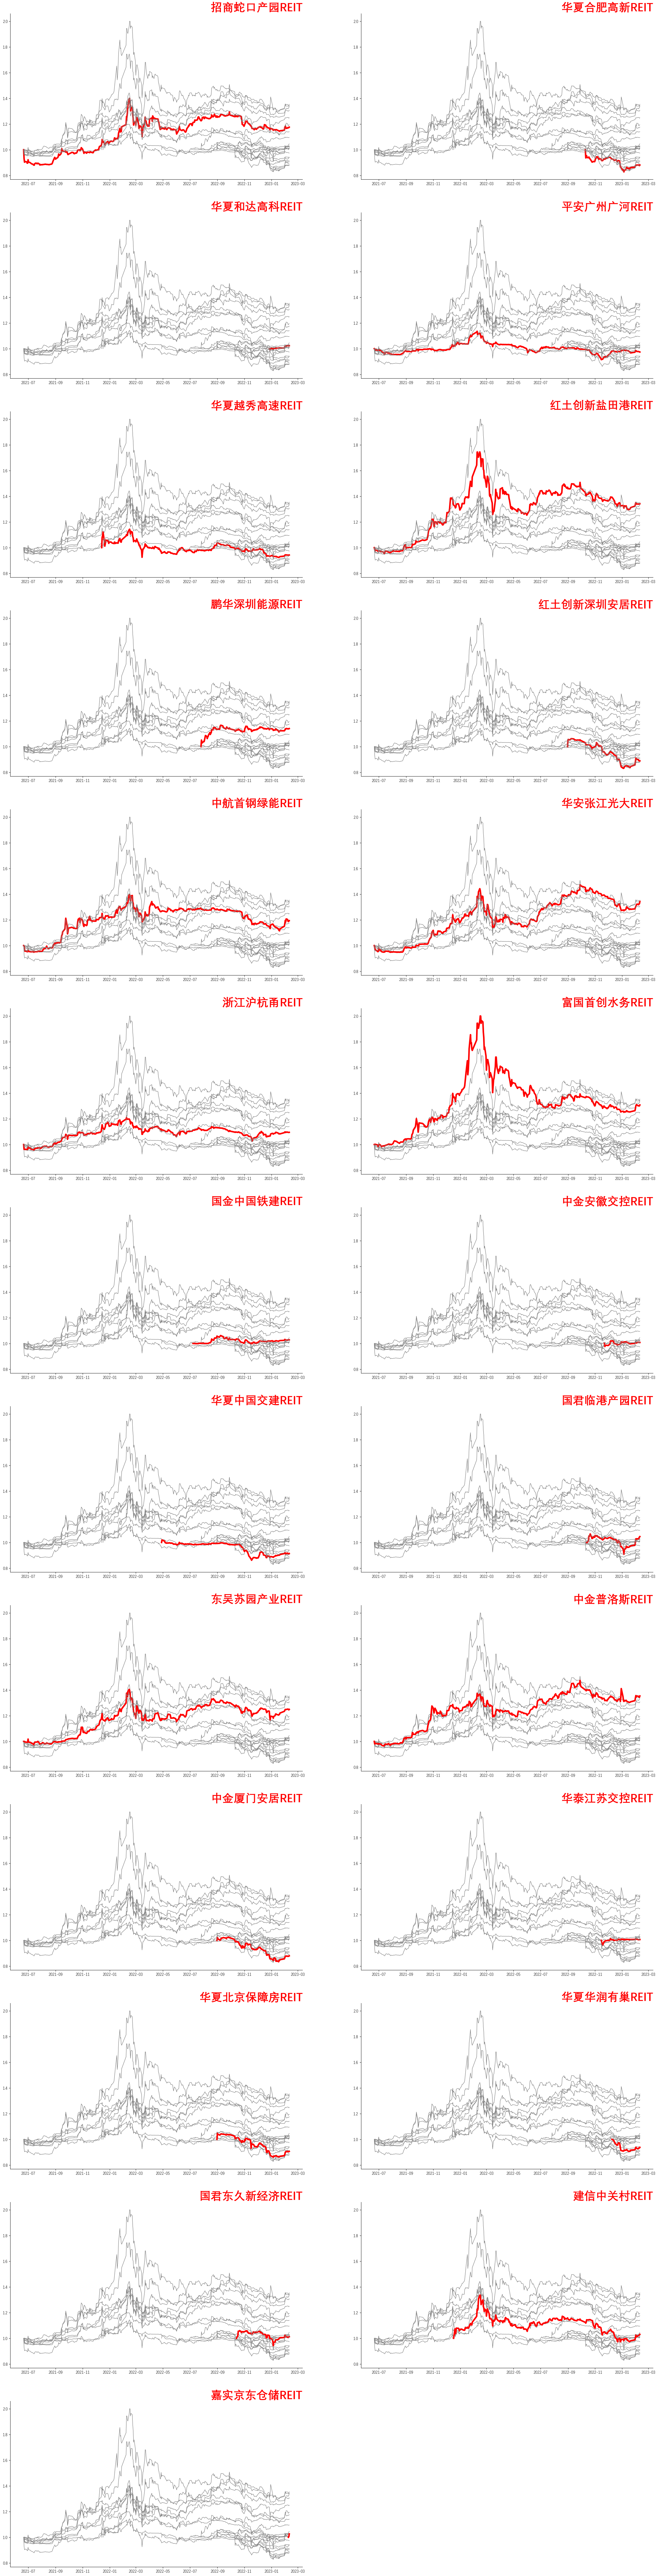

In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['font.family'] = 'Dengxian'
plt.rcParams['axes.unicode_minus'] = False

COLORS = ['red','gray']
LINES = [4,1]

fig, axs = plt.subplots(13,2, figsize=(30,120))
for i, v in zip(range(25),reits_id.keys()):
    r = int(i/2)
    c = int(i % 2)
    for k in reits_value.keys():
        if k == v:
            col = COLORS[0]
            l = LINES[0]
        else:
            col = COLORS[1]
            l = LINES[1]

        x = reits_value[k].index
        y = reits_value[k]['收盘价']/reits_value[k]['收盘价'][0]
        axs[r,c].plot(x,y,color=col,linewidth=l)

    axs[r,c].set_title(reits_id[v],loc='right',fontdict={'fontsize':30,'fontweight':'bold','color':'red'})
    axs[r,c].grid(False)
    axs[r,c].spines['top'].set_color('None')
    axs[r,c].spines['right'].set_color('None')

axs[12,1].set_axis_off()

In [7]:
import riskfolio as rp
rp.__version__

'3.3.0'

**第四步：构建REITs基金累计净值数据集**

In [8]:
rdata = pd.DataFrame()

for k in reits_value.keys():
    rdata = pd.concat([rdata,reits_value[k]['收盘价']], axis=1)

rdata.columns = list(reits_id.values())

rdata

招商蛇口产园REIT  华夏合肥高新REIT  华夏和达高科REIT  平安广州广河REIT  华夏越秀高速REIT  \
2021-06-21    2.650000         NaN         NaN   13.108000         NaN   
2021-06-22    2.464000         NaN         NaN   13.050000         NaN   
2021-06-23    2.393000         NaN         NaN   13.026000         NaN   
2021-06-24    2.400000         NaN         NaN   12.963000         NaN   
2021-06-25    2.407000         NaN         NaN   13.045000         NaN   
...                ...         ...         ...         ...         ...   
2023-02-06    3.095826       2.506       3.133   12.821348    8.211329   
2023-02-07    3.108293       2.508       3.126   12.817002    8.210282   
2023-02-08    3.102060       2.502       3.138   12.802875    8.206091   
2023-02-09    3.105176       2.495       3.129   12.778969    8.211329   
2023-02-10    3.115565       2.508       3.131   12.768102    8.214472   

            红土创新盐田港REIT  鹏华深圳能源REIT  红土创新深圳安居REIT  中航首钢绿能REIT  华安张江光大REIT  \
2021-06-21     2.367000         NaN           NaN   14.711000    3.166000   
2021-06-22     2.335000         NaN           NaN   14.700000    3.121000   
2021-06-23     2.308000         NaN           NaN   14.288000    3.059000   
2021-06-24     2.323000         NaN           NaN   14.070000    3.062000   
2021-06-25     2.324000         NaN           NaN   14.078000    3.051000   
...                 ...         ...           ...         ...         ...   
2023-02-06     3.169366       8.161         2.910   17.706176    4.185705   
2023-02-07     3.170382       8.148         2.884   17.515775    4.171218   
2023-02-08     3.170382       8.160         2.875   17.452308    4.192949   
2023-02-09     3.168349       8.156         2.868   17.559975    4.195018   
2023-02-10     3.174450       8.170         2.871   17.561108    4.252966   

            ...  国君临港产园REIT  东吴苏园产业REIT  中金普洛斯REIT  中金厦门安居REIT  华泰江苏交控REIT  \
2021-06-21  ...         NaN    3.907000   3.972000         NaN         NaN   
2021-06-22  ...         NaN    3.907000   3.894000         NaN         NaN   
2021-06-23  ...         NaN    3.906000   3.911000         NaN         NaN   
2021-06-24  ...         NaN    3.885000   3.901000         NaN         NaN   
2021-06-25  ...         NaN    3.887000   3.909000         NaN         NaN   
...         ...         ...         ...        ...         ...         ...   
2023-02-06  ...       5.502    4.888704   5.370433       2.964       7.685   
2023-02-07  ...       5.517    4.886660   5.363165       2.959       7.680   
2023-02-08  ...       5.544    4.883594   5.340321       2.963       7.676   
2023-02-09  ...       5.582    4.865196   5.338244       2.966       7.686   
2023-02-10  ...       5.599    4.880528   5.376664       2.973       7.688   

            华夏北京保障房REIT  华夏华润有巢REIT  国君东久新经济REIT  建信中关村REIT  嘉实京东仓储REIT  
2021-06-21          NaN         NaN          NaN        NaN         NaN  
2021-06-22          NaN         NaN          NaN        NaN         NaN  
2021-06-23          NaN         NaN          NaN        NaN         NaN  
2021-06-24          NaN         NaN          NaN        NaN         NaN  
2021-06-25          NaN         NaN          NaN        NaN         NaN  
...                 ...         ...          ...        ...         ...  
2023-02-06        2.959       2.616        3.895   4.238112         NaN  
2023-02-07        2.949       2.626        3.884   4.252266         NaN  
2023-02-08        2.949       2.626        3.895   4.259343       3.923  
2023-02-09        2.950       2.649        3.905   4.264398       3.942  
2023-02-10        2.957       2.647        3.908   4.286640       4.025  

[399 rows x 25 columns]

**第五步：相关性**

C:\Users\ThinkPad\.conda\envs\qtconda\lib\site-packages\riskfolio\PlotFunctions.py:2256: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


<Axes: title={'center': 'Assets Clustermap'}>

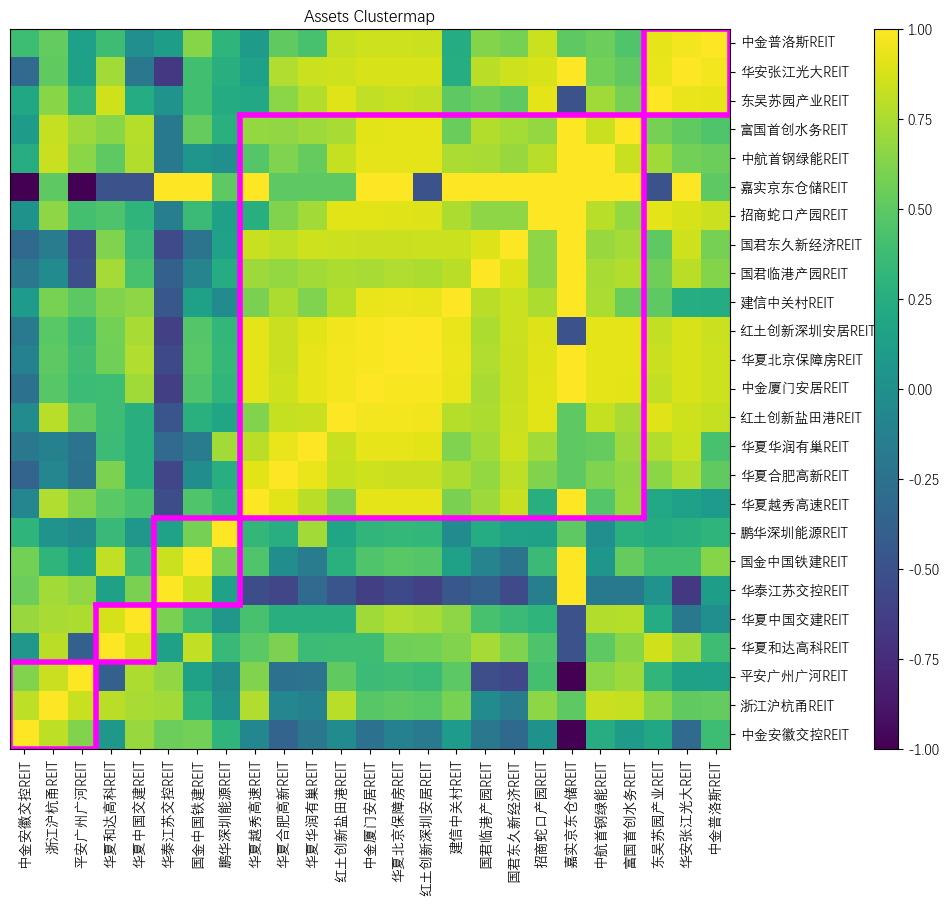

In [9]:
rp.plot_clusters(returns=rdata,
                 codependence='spearman',
                 linkage='ward',
                 k=None,
                 max_k=10,
                 leaf_order=True,
                 dendrogram=False,
                 title='Assets Clustermap',
                 ax=None)